# Importing Libraries

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from basic_imports import *
import pandas

from math import radians, cos, sin, asin, sqrt

import folium
import datetime
from constants import *
from load_files import *
from scipy.stats import *
from scipy import spatial
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [111]:
plt.style.use('seaborn-notebook')

# Functions

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
def model(dataset):
    
    df = dataset.drop(['timestamp','pm2_5', 'closest_pm', 'closest_pm_id', '15min_avg', '30min_avg', 'city', 'hour_of_day'], axis = 1)
    labels = dataset[['pm2_5']]
    X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.25, random_state=0)


    reg = ExtraTreesRegressor(n_estimators=90,max_depth=40,max_features=4,random_state=0).fit(np.asarray(X_train), np.ravel(y_train))         

    pred = reg.predict(X_test)


    mape = mean_absolute_percentage_error(list(y_test.pm2_5), pred)
    print(mape)
        
    return reg

In [55]:
def combined(pdataset, ldataset, gdataset):
    
    pdf = pdataset.drop(['timestamp','pm2_5', 'closest_pm_id', '15min_avg', '30min_avg', 'city'], axis = 1)
    plabels = pdataset[['pm2_5']]

    ldf = ldataset.drop(['timestamp','pm2_5', 'closest_pm_id', '15min_avg', '30min_avg', 'city'], axis = 1)
    llabels = ldataset[['pm2_5']]

    gdf = gdataset.drop(['timestamp','pm2_5', 'closest_pm_id', '15min_avg', '30min_avg', 'city'], axis = 1)
    glabels = gdataset[['pm2_5']]


    pX_train, pX_test, py_train, py_test = train_test_split(pdf, plabels, test_size=0.25, random_state=0)
    lX_train, lX_test, ly_train, ly_test = train_test_split(ldf, llabels, test_size=0.25, random_state=0)
    gX_train, gX_test, gy_train, gy_test = train_test_split(gdf, glabels, test_size=0.25, random_state=0)

    X_train = pd.concat([pX_train, lX_train, gX_train])
    y_train = pd.concat([py_train, ly_train, gy_train])
    X_test = pd.concat([pX_test, lX_test, gX_test])
    y_test = pd.concat([py_test, ly_test, gy_test])


    reg = ExtraTreesRegressor(n_estimators=1000, random_state=0).fit(np.asarray(X_train), np.ravel(y_train))         

    pred = reg.predict(X_test)


    mape = mean_absolute_percentage_error(list(y_test.pm2_5), pred)
    print(mape)
        
    return reg

In [129]:
combined_model = combined(peeps,leon, guadalajara)

14.43291205417973


# Files

In [83]:
ress = pd.read_excel("Book1.xlsx",sheet_name="Sheet7", engine='openpyxl', index_col=0)

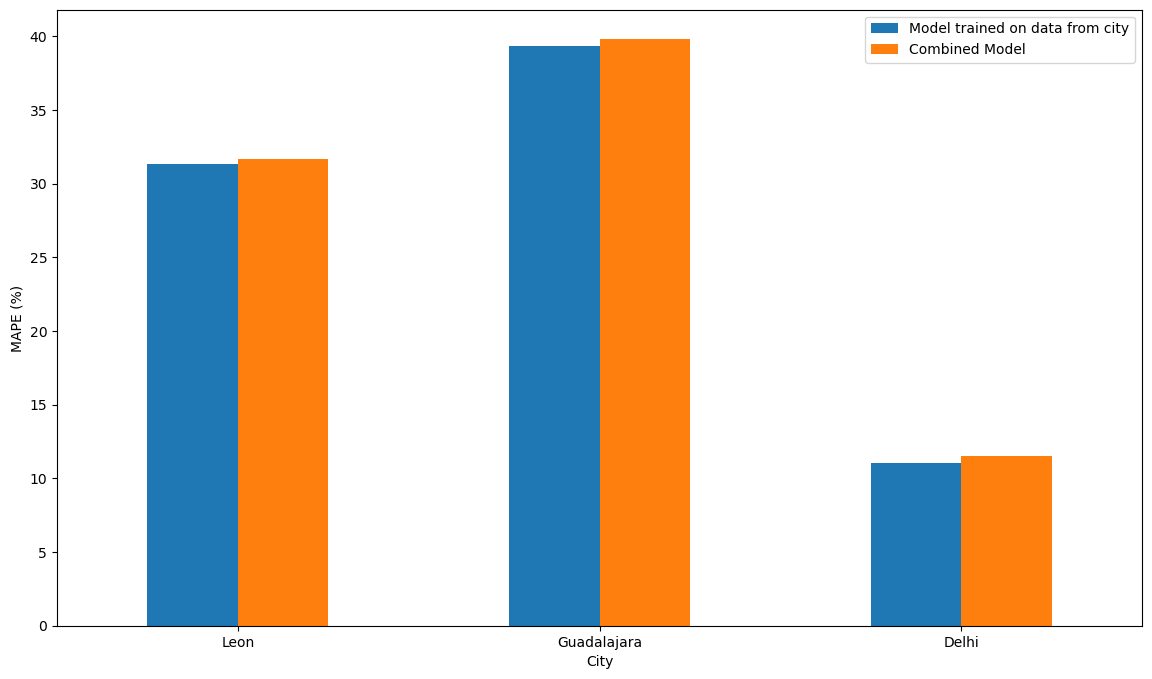

In [41]:
ax = ress.plot(y=["Model trained on data from city", "Combined Model"], kind="bar", figsize=(14, 8), ylabel="MAPE (%)", xlabel="City", rot=0)
fig =ax.get_figure()



fig.savefig("combined.png", dpi=300)

In [48]:
rd = pd.read_csv('road_dict.csv', header=0).to_dict('records')
road_dict = rd[0]

In [49]:
peeps = pd.read_csv("../preprocessing/peeps_spatial_T.csv")
peeps = peeps.drop(['Unnamed: 0'], axis =1)
peeps = peeps.replace({"roadType": road_dict})
peeps[['city']] = 2

In [50]:
df = peeps.drop(['timestamp','pm2_5', 'closest_pm', 'closest_pm_id','15min_avg', '30min_avg', 'city'], axis = 1)
labels = peeps[['pm2_5']]
peeps_X_train, peeps_X_test, peeps_y_train, peeps_y_test = train_test_split(df, labels, test_size=0.25, random_state=0)

In [51]:
leon = pd.read_csv("../preprocessing/leon_spatial_T.csv")
leon = leon.drop(['Unnamed: 0', 'walk'], axis =1)
leon = leon.replace({"roadType": road_dict})
guadalajara = pd.read_csv("../preprocessing/guadalajara_spatial_T.csv")
guadalajara = guadalajara.drop(['Unnamed: 0', 'walk'], axis =1)
guadalajara = guadalajara.replace({"roadType": road_dict})

In [52]:
df = leon.drop(['timestamp','pm2_5', 'closest_pm', 'closest_pm_id', '15min_avg', '30min_avg', 'city'], axis = 1)
labels = leon[['pm2_5']]
leon_X_train, leon_X_test, leon_y_train, leon_y_test = train_test_split(df, labels, test_size=0.25, random_state=0)

In [53]:
df = guadalajara.drop(['timestamp','pm2_5', 'closest_pm', 'closest_pm_id', '15min_avg', '30min_avg', 'city'], axis = 1)
labels = guadalajara[['pm2_5']]
guadalajara_X_train, guadalajara_X_test, guadalajara_y_train, guadalajara_y_test = train_test_split(df, labels, test_size=0.25, random_state=0)

# Models

In [32]:
delhi_model = model(peeps)

11.0177251622377


In [52]:
leon_model = model(leon)

31.324309241118375


In [64]:
gdl_model = model(guadalajara)

40.028062729673486


# Leggo

## Leon test

In [134]:
predlc = combined_model.predict(leon_X_test)
mapelc = mean_absolute_percentage_error(list(leon_y_test.pm2_5), predlc)
mapelc

31.658204242595716

In [ ]:
#mapelc = 31.658204242595716

In [68]:
predl1 = leon_model.predict(leon_X_test)
mapel1 = mean_absolute_percentage_error(list(leon_y_test.pm2_5), predl1)
mapel1

31.324309241118375

In [69]:
predl2 = gdl_model.predict(leon_X_test)
mapel2 = mean_absolute_percentage_error(list(leon_y_test.pm2_5), predl2)
mapel2

53.16847627242004

In [70]:
predl3 = delhi_model.predict(leon_X_test)
mapel3 = mean_absolute_percentage_error(list(leon_y_test.pm2_5), predl3)
mapel3

99.38371983499088

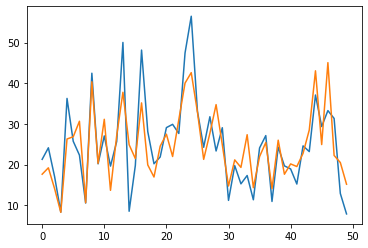

In [71]:

plt.plot(leon_y_test.pm2_5.values[:50])
plt.plot(predl1[:50])


In [72]:
le = pd.DataFrame(predl1, columns =['PM2.5'])
gd = pd.DataFrame(predl2, columns=['PM2.5'])
dl = pd.DataFrame(predl3, columns=['PM2.5'])
ta = pd.DataFrame(leon_y_test.pm2_5.values, columns=['PM2.5'])
le[''] = 'Leon'
gd[''] = 'Guadalajara-model\n Predictions'
dl[''] = 'Delhi-model\n Predictions'
ta[''] = 'Target'

In [73]:
leon_da = pd.concat([ta, gd, dl])

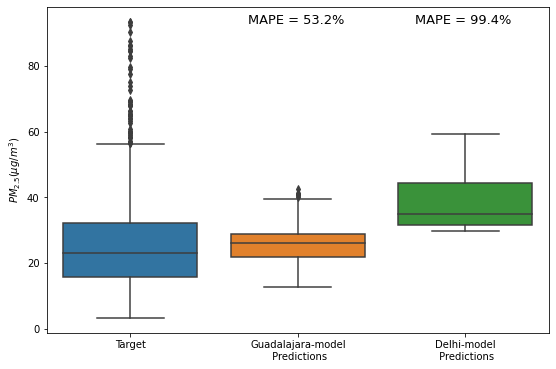

In [80]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot()



sns.boxplot(x="", y="PM2.5", data=leon_da)
plt.ylabel("$PM_{2.5} (µg/m^3)$")
ax.text(1.7, 93, f'MAPE = {round(mapel3, 1)}%', fontsize=13)
ax.text(0.7, 93, f'MAPE = {round(mapel2, 1)}%', fontsize=13)

plt.savefig("leon_as_test.png")

## Guadalajara test

In [126]:
predgc = combined_model.predict(guadalajara_X_test)
mapegc = mean_absolute_percentage_error(list(guadalajara_y_test.pm2_5), predgc)
mapegc

52.45409129049284

In [81]:
predg1 = gdl_model.predict(guadalajara_X_test)
mapeg1 = mean_absolute_percentage_error(list(guadalajara_y_test.pm2_5), predg1)
mapeg1

40.028062729673486

In [82]:
predg2 = leon_model.predict(guadalajara_X_test)
mapeg2 = mean_absolute_percentage_error(list(guadalajara_y_test.pm2_5), predg2)
mapeg2

91.6990786363127

In [83]:
predg3 = delhi_model.predict(guadalajara_X_test)
mapeg3 = mean_absolute_percentage_error(list(guadalajara_y_test.pm2_5), predg3)
mapeg3

134.46236312155494

In [84]:
gd = pd.DataFrame(predg1, columns =['PM2.5'])
le = pd.DataFrame(predg2, columns=['PM2.5'])
dl = pd.DataFrame(predg3, columns=['PM2.5'])
ta = pd.DataFrame(guadalajara_y_test.pm2_5.values, columns=['PM2.5'])
ta[''] = 'Target'
le[''] = 'Leon-model\n Predictions'
gd[''] = 'Guadalajara'
dl[''] = 'Delhi-model\n Predictions'

In [85]:
gdl_da = pd.concat([ta, le, dl])

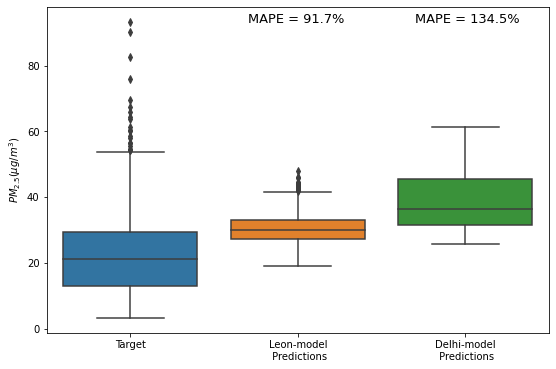

In [86]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot()
sns.boxplot(x="", y="PM2.5", data=gdl_da)
plt.ylabel("$PM_{2.5} (µg/m^3)$")
ax.text(1.7, 93, f'MAPE = {round(mapeg3, 1)}%', fontsize=13)
ax.text(0.7, 93, f'MAPE = {round(mapeg2, 1)}%', fontsize=13)


plt.savefig("gdl_as_test.png")

## Delhi test

In [127]:
preddc = combined_model.predict(peeps_X_test)
mapedc = mean_absolute_percentage_error(list(peeps_y_test.pm2_5), preddc)
mapedc

11.519511352224383

In [91]:
predd1 = delhi_model.predict(peeps_X_test)
maped1 = mean_absolute_percentage_error(list(peeps_y_test.pm2_5), predd1)
maped1

11.0177251622377

In [92]:
predd2 = leon_model.predict(peeps_X_test)
maped2 = mean_absolute_percentage_error(list(peeps_y_test.pm2_5), predd2)
maped2

181.05528954779214

In [93]:
predd3 = gdl_model.predict(peeps_X_test)
maped3 = mean_absolute_percentage_error(list(peeps_y_test.pm2_5), predd3)
maped3

114.26221170496278

In [94]:
dl = pd.DataFrame(predd1, columns =['PM2.5'])
le = pd.DataFrame(predd2, columns=['PM2.5'])
gd = pd.DataFrame(predd3, columns=['PM2.5'])
ta = pd.DataFrame(peeps_y_test.pm2_5.values, columns=['PM2.5'])
ta[''] = 'Target'
le[''] = 'Leon-model\n Predictions'
gd[''] = 'Guadalajara-model\n Predictions'
dl[''] = 'Delhi'

In [95]:
delhi_da = pd.concat([ta, le, gd])#, dl])

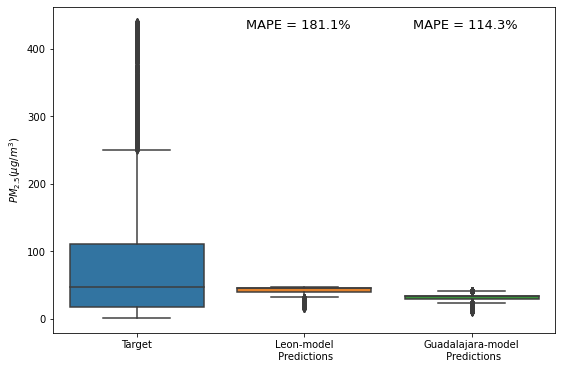

In [97]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot()
sns.boxplot(x="", y="PM2.5", data=delhi_da)
plt.ylabel("$PM_{2.5} (µg/m^3)$")
ax.text(1.65, 430, f'MAPE = {round(maped3, 1)}%', fontsize=13)
ax.text(0.65, 430, f'MAPE = {round(maped2, 1)}%', fontsize=13)
plt.savefig("delhi_as_test.png")